In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/AI201715064')

%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train 데이터를 라벨 있는 것과 없는 것으로 나누기
X_train_labeled, X_train_unlabeled, y_train_labeled, y_train_unlabeled = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42, stratify=y_train)

# 라벨 없는 데이터는 라벨을 -1로 표시
y_train_unlabeled[:] = -1

print("라벨이 있는 데이터 shape-> X: {},  Y: {}".format(X_train_labeled.shape, y_train_labeled.shape))
print("라벨이 없는 데이터 shape-> X: {},  Y: {}".format(X_train_unlabeled.shape, y_train_unlabeled.shape))

# 라벨 있는 데이터와 없는 데이터를 합치기
X_train_combined = np.vstack((X_train_labeled, X_train_unlabeled))
y_train_combined = np.concatenate((y_train_labeled, y_train_unlabeled))

print("전체 학습 데이터 shape-> X: {},  Y: {}".format(X_train_combined.shape, y_train_combined.shape))

라벨이 있는 데이터 shape-> X: (227, 30),  Y: (227,)
라벨이 없는 데이터 shape-> X: (228, 30),  Y: (228,)
전체 학습 데이터 shape-> X: (455, 30),  Y: (455,)


# 1. X_train_combined 기반으로 차원 축소

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_combined)

# 2. 차원 축소된 X_train_combined 기반으로 clustering 진행
- label이 있는 X_train_labeled 데이터를 기반으로 clustering이 얼마나 잘되었는지 scatter를 통해 시각화

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


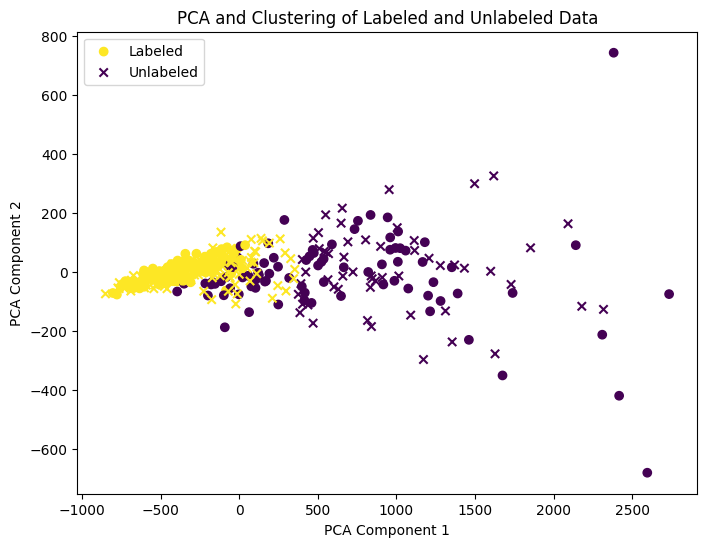

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train_pca)

# label이 있는 X_train_labeled 데이터를 기반으로 clustering이 얼마나 잘되었는지 scatter를 통해 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[y_train_combined != -1, 0], X_train_pca[y_train_combined != -1, 1], c=y_train_combined[y_train_combined != -1], cmap='viridis', marker='o', label='Labeled')
plt.scatter(X_train_pca[y_train_combined == -1, 0], X_train_pca[y_train_combined == -1, 1], c=clusters[y_train_combined == -1], cmap='viridis', marker='x', label='Unlabeled')
plt.legend()
plt.title('PCA and Clustering of Labeled and Unlabeled Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# 3. Clustering 된 cluster 기반으로 라벨이 없는 X_train_unlabeled 에 라벨 부여

In [ ]:
y_train_unlabeled = clusters[len(X_train_labeled):]

# 라벨 있는 데이터와 새로 라벨링된 데이터를 합치기
y_train_combined = np.concatenate((y_train_labeled, y_train_unlabeled))

# 4. 전체 X_train_combined 기반으로 classification 학습 진행

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_combined, y_train_combined)

RandomForestClassifier(random_state=42)

# 5. X_test 기반으로 classification 모델 평가
- accuracy, f1-score, confusion matrix, AUC, ROC 커브 등 활용

Accuracy: 0.9385964912280702
F1 Score: 0.953020134228188
Confusion Matrix:
[[36  6]
 [ 1 71]]
ROC AUC: 0.9216269841269842


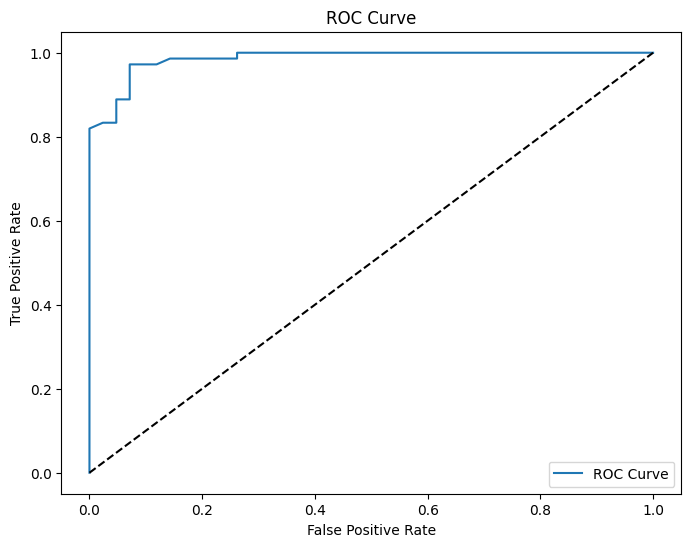

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}") # 정확도 도출
print(f"F1 Score: {f1}") # f1스코어 도출
print(f"Confusion Matrix:\n{conf_matrix}") # 컨퓨전 매트릭스 도출
print(f"ROC AUC: {roc_auc}") # ROC_AUC 도출

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
!jupyter nbconvert --to html "뇌과학_과제_2.ipynb"

[NbConvertApp] Converting notebook 뇌과학_과제_2.ipynb to html
[NbConvertApp] Writing 737726 bytes to 뇌과학_과제_2.html
